In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 
import os, copy, sys, platform
import matplotlib.font_manager as fm  # 폰트 관련 용도
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
path = 'C:\\Windows\\Fonts\\Gothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
rc('font', family=font_name)
rc('figure', figsize = (20,10))
rc('axes', grid = True)
rc('xtick', c = 'white')
rc('ytick', c = 'white')

In [4]:
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd
import numpy as np
import FinanceDataReader as fdr


### 네이버 금융 Financial Summary 불러오기 ###
def Naver_FS(code, fin_type='0', freq_type='Q') :
# code: 종목코드
# fin_type = '0': 재무제표 종류 (0: 주재무제표, 1: GAAP개별, 2: GAAP연결, 3: IFRS별도, 4:IFRS연결)
# freq_type = 'Y': 기간 (Y:년, Q:분기)
    print('running : ', code, '...')
    url = f'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd={code}&fin_typ={fin_type}&freq_typ={freq_type}'

    driver = webdriver.Chrome(r"C:\Users\chromedriver.exe")
    driver.get(url)
    driver.find_elements_by_xpath('//*[@class="schtab"][1]/tbody/tr/td[4]')[0].click()
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    table = soup.select('table')

    # html → 문자열
    table_html = str(table)

    # pandas의 read_html 로 테이블 정보 읽기
    table_df_list = pd.read_html(table_html)

    # Data Frame 선택
    fs = table_df_list[12] # 12 : Financial Summary
    
    fs.set_index(('주요재무정보','주요재무정보'), inplace=True)
    fs.index.rename('주요재무정보', inplace=True) #주요재무정보로 인덱싱
    fs.columns = fs.columns.droplevel(0) # 불필요한 열 제거
    
    driver.close()
    return fs

In [5]:
screening_list = ['014830', '263750', '214150', '031980', '004000', '252990', '011070', '326030', '103140']
for i in range(len(screening_list)):
    globals()[f'df{i}'] = Naver_FS(screening_list[int(f'{i}')])

running :  014830 ...


C:\Users\CA5C8~1.WLE\AppData\Local\Temp/ipykernel_32744/4137540672.py:16: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\chromedriver.exe")
C:\Users\CA5C8~1.WLE\AppData\Local\Temp/ipykernel_32744/4137540672.py:18: DeprecationWarning: find_elements_by_xpath is deprecated. Please use find_elements(by=By.XPATH, value=xpath) instead
  driver.find_elements_by_xpath('//*[@class="schtab"][1]/tbody/tr/td[4]')[0].click()


running :  263750 ...
running :  214150 ...
running :  031980 ...
running :  004000 ...
running :  252990 ...
running :  011070 ...
running :  326030 ...
running :  103140 ...


In [6]:
def OPGR(df) :
    new_data = [np.NaN]
    for i in range(len(df.columns)) :
        if i == 7 :
            pass
        else : 
            if df.iloc[1, i] < 0 : 
                x = 1
                new_data.append(round((df.iloc[1, i + 1] - df.iloc[1, i]) / x * 100, 2))
            else :
                x = df.iloc[1, i]
                new_data.append(round((df.iloc[1, i + 1] - df.iloc[1, i]) / x * 100, 2))
    df.loc['영업이익증가율'] = new_data
    return df

In [7]:
for i in range(len(screening_list)) :
    OPGR(globals()[f'df{i}'])

In [8]:
df5

,2020/12 (IFRS별도),2021/03 (IFRS별도),2021/06 (IFRS별도),2021/09 (IFRS별도),2021/12 (IFRS별도),2022/03(E) (IFRS별도),2022/06(E) (IFRS별도),2022/09(E) (IFRS별도)
주요재무정보,,,,,,,,
매출액,NaN,NaN,134.00,126.00,104.00,NaN,NaN,NaN
영업이익,NaN,NaN,37.00,37.00,30.00,NaN,NaN,NaN
영업이익(발표기준),NaN,NaN,37.00,37.00,30.00,NaN,NaN,NaN
세전계속사업이익,NaN,NaN,36.00,38.00,31.00,NaN,NaN,NaN
당기순이익,NaN,NaN,24.00,38.00,27.00,NaN,NaN,NaN
당기순이익(지배),NaN,NaN,24.00,38.00,27.00,NaN,NaN,NaN
당기순이익(비지배),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
자산총계,467.00,NaN,1039.00,1080.00,1608.00,NaN,NaN,NaN
부채총계,222.00,NaN,79.00,82.00,537.00,NaN,NaN,NaN


In [9]:
def EPSGR(df) :
    new_data = [np.NaN]
    for i in range(len(df.columns)) :
        if i == 7 :
            pass
        else : 
            if df.iloc[25, i] < 0 : 
                x = 1
                new_data.append(round((df.iloc[25, i + 1] - df.iloc[25, i]) / x * 100, 2))
            else :
                x = df.iloc[25, i]
                new_data.append(round((df.iloc[25, i + 1] - df.iloc[25, i]) / x * 100, 2))
    df.loc['EPS성장율'] = new_data
    return df

In [10]:
for i in range(len(screening_list)) :
    EPSGR(globals()[f'df{i}'])

In [11]:
def PEG(df) :
    new_data = []
    for i in range(len(df.columns)) :
        if df.iloc[34, i] < 0 or df.iloc[34, i] == np.NaN: 
            x = 1
            new_data.append(round(df.iloc[26, i] / x, 2))
        else :
            x = df.iloc[34, i]
            new_data.append(round(df.iloc[26, i] / x, 2))
    df.loc['PEG'] = new_data
    return df

In [12]:
for i in range(len(screening_list)) :
    PEG(globals()[f'df{i}'])

In [13]:
df8

,2020/12 (IFRS연결),2021/03 (IFRS연결),2021/06 (IFRS연결),2021/09 (IFRS연결),2021/12 (IFRS연결),2022/03(E) (IFRS연결),2022/06(E) (IFRS연결),2022/09(E) (IFRS연결)
주요재무정보,,,,,,,,
매출액,7988.00,7252.00,9234.00,8848.00,9761.00,8558.00,9836.00,9474.00
영업이익,535.00,624.00,1065.00,808.00,644.00,455.00,635.00,581.00
영업이익(발표기준),535.00,624.00,1065.00,808.00,644.00,NaN,NaN,NaN
세전계속사업이익,436.00,581.00,1040.00,860.00,588.00,413.00,603.00,558.00
당기순이익,337.00,455.00,808.00,614.00,557.00,338.00,462.00,420.00
당기순이익(지배),336.00,455.00,807.00,614.00,557.00,304.00,458.00,390.00
당기순이익(비지배),0.00,0.00,1.00,0.00,0.00,NaN,NaN,NaN
자산총계,25520.00,27424.00,28840.00,30256.00,31483.00,NaN,NaN,NaN
부채총계,11056.00,12598.00,13224.00,13929.00,14626.00,NaN,NaN,NaN


C:\Users\C.W Lee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\C.W Lee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\C.W Lee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\C.W Lee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0, flags=flags)


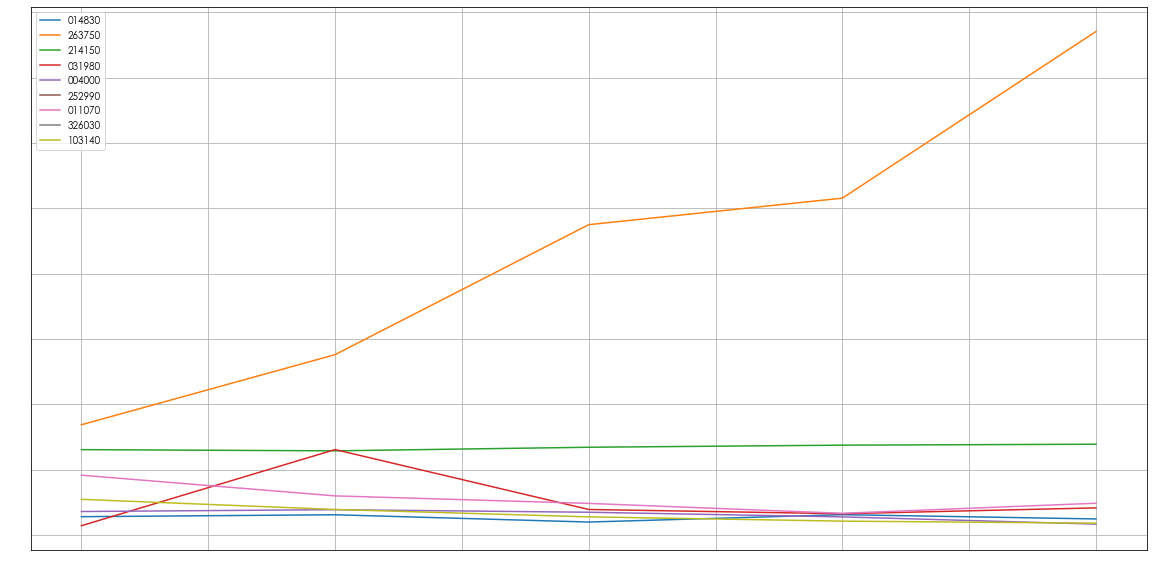

In [14]:
#PER PLOT 만들기
per = pd.DataFrame()
for j, i in enumerate(screening_list) : 
    per[f'{i}'] = globals()[f'df{j}'].loc['PER(배)']
#per_y = per.iloc[0:int(len(per)/2)]
#per_q = per.iloc[int(len(per)/2):len(per)]
#per_q.plot()

per.plot()

C:\Users\C.W Lee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\C.W Lee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\C.W Lee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\C.W Lee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0, flags=flags)


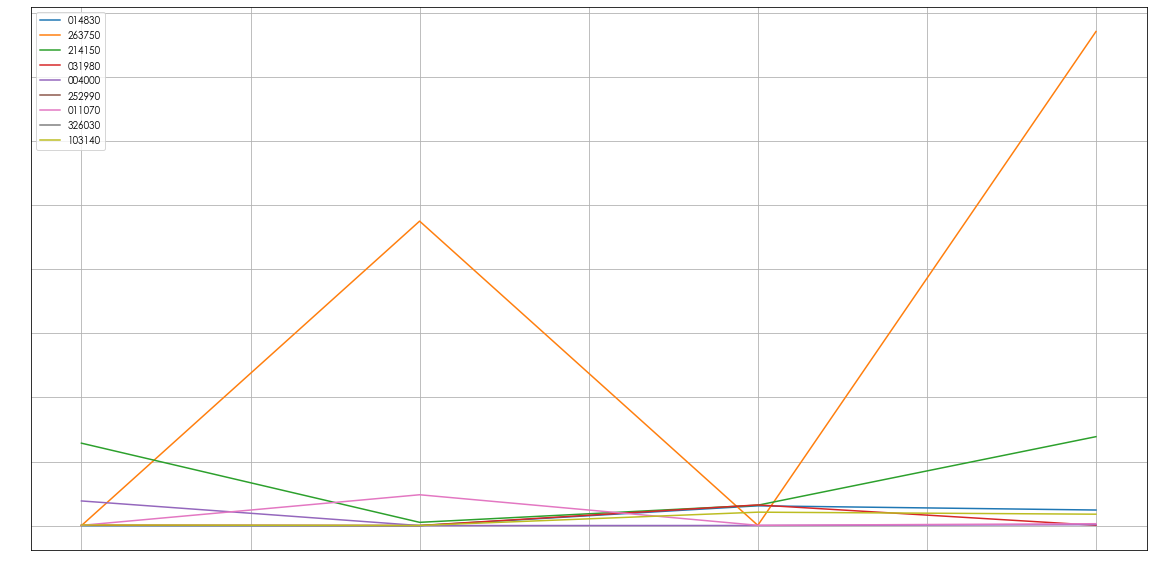

In [15]:
#PEG PLOT 만들기
peg = pd.DataFrame()
for j, i in enumerate(screening_list) : 
    peg[f'{i}'] = globals()[f'df{j}'].loc['PEG']
# peg_y = peg.iloc[0:int(len(peg)/2)]
# peg_q = peg.iloc[int(len(peg)/2):len(peg)]
# peg_q.plot()
peg.plot()

C:\Users\C.W Lee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\C.W Lee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\C.W Lee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\C.W Lee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0, flags=flags)


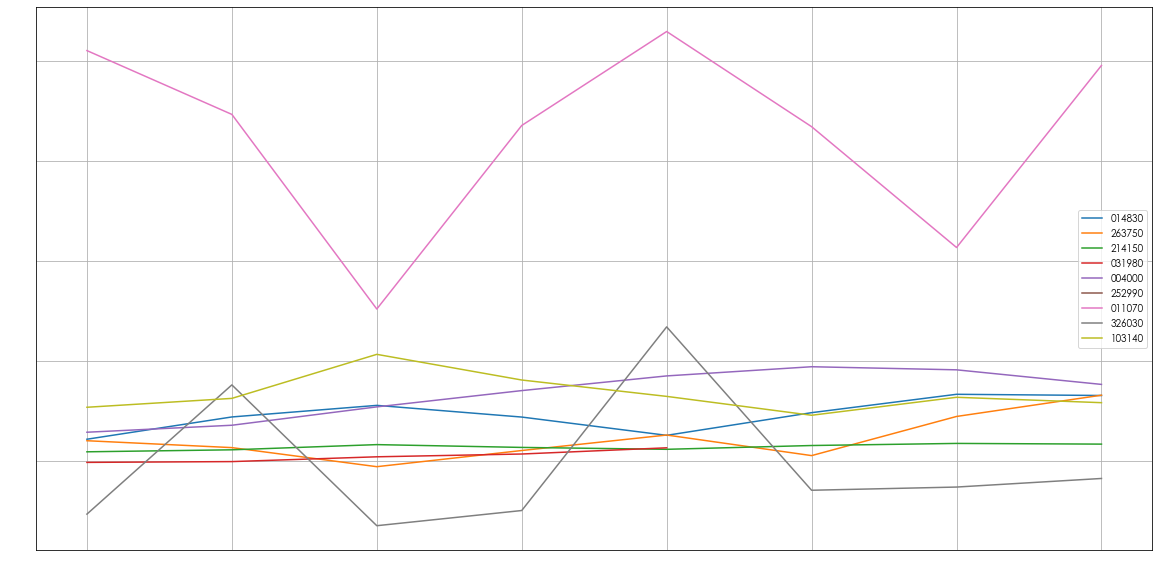

In [20]:
#영업이익증가율 PLOT 만들기
opm = pd.DataFrame()
for j, i in enumerate(screening_list) : 
    opm[f'{i}'] = globals()[f'df{j}'].loc['영업이익']
# opgr_y = opgr.iloc[0:int(len(peg)/2)]
# opgr_q = opgr.iloc[int(len(peg)/2):len(peg)]
# opgr_q.plot()
opm.plot(figsize = (20,10))

C:\Users\C.W Lee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\C.W Lee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\C.W Lee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\C.W Lee\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0, flags=flags)


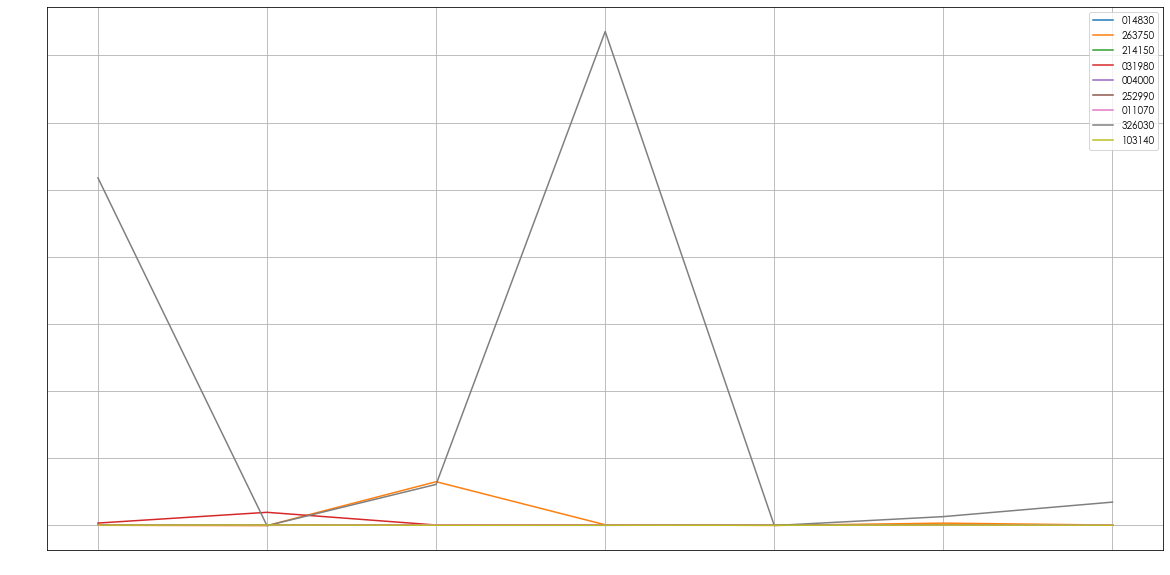

In [16]:
#영업이익증가율 PLOT 만들기
opgr = pd.DataFrame()
for j, i in enumerate(screening_list) : 
    opgr[f'{i}'] = globals()[f'df{j}'].loc['영업이익증가율']
# opgr_y = opgr.iloc[0:int(len(peg)/2)]
# opgr_q = opgr.iloc[int(len(peg)/2):len(peg)]
# opgr_q.plot()
opgr.plot(figsize = (20,10))

In [17]:
per

,014830,263750,214150,031980,004000,252990,011070,326030,103140
2020/12 (IFRS연결),5.58,33.73,26.11,2.82,7.16,NaN,18.29,NaN,10.89
2021/03 (IFRS연결),6.17,55.19,25.74,26.13,7.72,NaN,11.95,NaN,7.79
2021/06 (IFRS연결),3.94,94.99,26.84,7.79,6.94,NaN,9.65,NaN,5.53
2021/09 (IFRS연결),6.20,103.11,27.48,6.48,5.52,NaN,6.61,NaN,4.22
2021/12 (IFRS연결),4.89,154.13,27.77,8.28,3.31,NaN,9.70,117.39,3.59
2022/03(E) (IFRS연결),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022/06(E) (IFRS연결),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022/09(E) (IFRS연결),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
peg

,014830,263750,214150,031980,004000,252990,011070,326030,103140
2020/12 (IFRS연결),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021/03 (IFRS연결),0.03,0.03,25.74,0.14,7.72,NaN,0.11,NaN,0.22
2021/06 (IFRS연결),0.02,94.99,1.05,0.06,0.04,NaN,9.65,NaN,0.07
2021/09 (IFRS연결),6.20,0.12,6.39,6.48,0.07,NaN,0.12,NaN,4.22
2021/12 (IFRS연결),4.89,154.13,27.77,0.13,0.32,NaN,0.62,0.0,3.59
2022/03(E) (IFRS연결),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022/06(E) (IFRS연결),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022/09(E) (IFRS연결),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
opgr

,014830,263750,214150,031980,004000,252990,011070,326030,103140
2020/12 (IFRS연결),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021/03 (IFRS연결),103.72,-34.50,22.47,800.00,24.56,NaN,-15.56,129400.00,16.64
2021/06 (IFRS연결),26.48,-145.80,47.71,4800.00,51.83,NaN,-56.20,-185.77,70.67
2021/09 (IFRS연결),-21.12,16200.00,-17.39,71.79,30.24,NaN,121.00,15200.00,-24.13
2021/12 (IFRS연결),-41.88,151.96,-14.29,92.54,20.94,NaN,28.03,183900.00,-20.30
2022/03(E) (IFRS연결),89.37,-80.16,33.33,NaN,10.84,NaN,-22.17,-122.09,-29.35
2022/06(E) (IFRS연결),38.25,768.63,13.82,NaN,-3.29,NaN,-36.17,3200.00,39.56
2022/09(E) (IFRS연결),-1.80,48.08,-4.05,NaN,-16.04,NaN,85.39,8600.00,-8.50
